Лабораторна робота 4 Варіант 28

Завдання 1. Завантажити Diabetes Dataset Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє прогрес діабету через рік після вихідних даних. Провести попередній аналіз даних:

Вивести перших 5 рядків.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (7,5)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Unique values in 'sex': [ 0.05068012 -0.04464164]
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
target    1.000000
bmi       0.5864

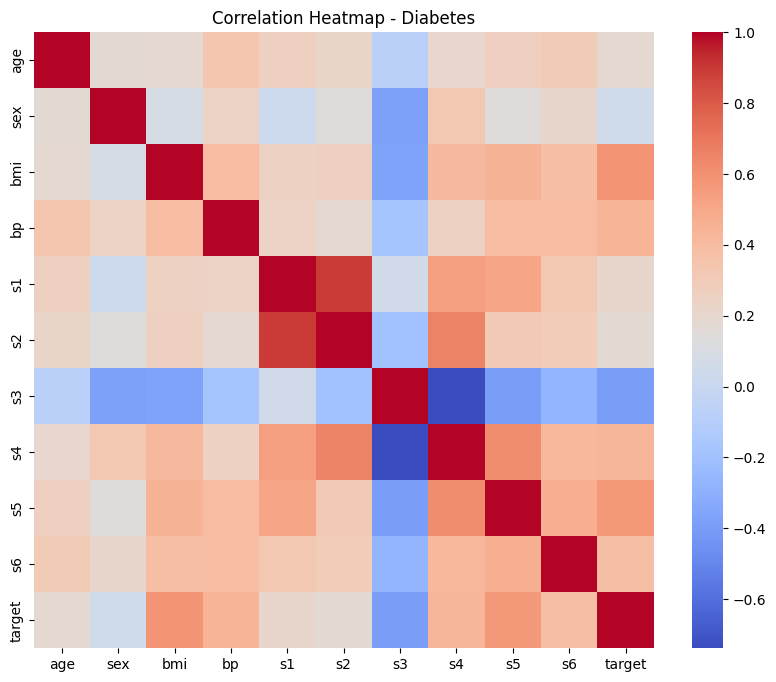

Top features: ['bmi', 's5', 'bp', 's4', 's3']

--- Diabetes Metrics ---
Linear R2: 0.4457531755875668
Linear MSE: 2936.483781870507
RandomForest R2: 0.41376807587856657
RandomForest MSE: 3105.9456938202243


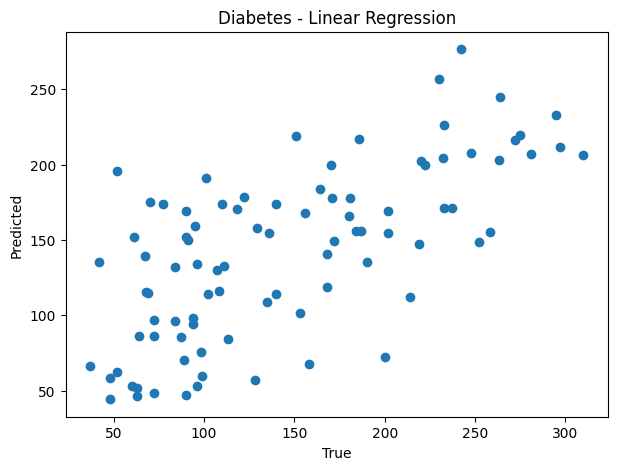

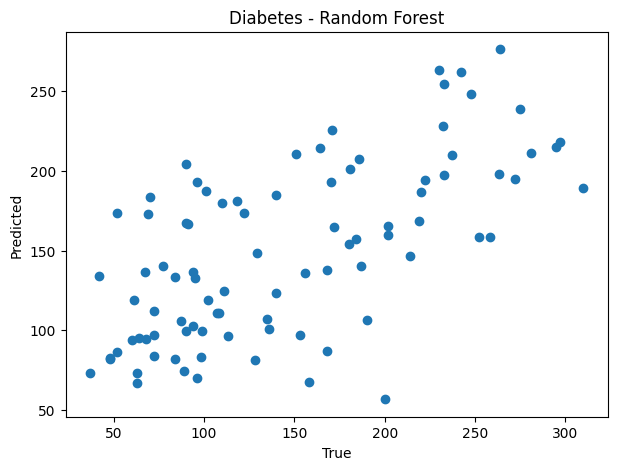

      True     Pred_LR  Pred_RF
287  219.0  147.272881  168.375
211   70.0  175.261468  183.335
72   202.0  169.142907  165.485
321  230.0  256.793222  263.075
73   111.0  132.806619  124.395
418   84.0   96.259348   81.895
367  242.0  276.523645  262.070
354  272.0  216.044199  194.980
281   94.0   94.201118  136.535
148   96.0  134.188398  192.940
429   94.0   98.057399  102.915
78   252.0  148.437758  158.240
126   99.0   59.782163   99.810
113  297.0  211.382101  217.825
329  135.0  109.013406  107.210
427   67.0  139.336529  136.335
172  295.0  232.980391  215.225
268  264.0  245.100903  276.285
76   170.0  199.410018  192.795
116  275.0  219.809598  238.595


In [ ]:


diabetes = datasets.load_diabetes(as_frame=True)
df_d = diabetes.frame.copy()


print(df_d.head())


df_d.fillna(df_d.mean(), inplace=True)


df_d.drop_duplicates(inplace=True)


if 'sex' in df_d.columns:
    print("Unique values in 'sex':", df_d['sex'].unique())


print(df_d.dtypes)


corr_with_target = df_d.corr()['target'].sort_values(ascending=False)
print(corr_with_target)


plt.figure(figsize=(10,8))
sns.heatmap(df_d.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Diabetes")
plt.show()


X_d = df_d.drop('target', axis=1)
y_d = df_d['target']
scaler_d = StandardScaler()
X_d_scaled = scaler_d.fit_transform(X_d)


X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_d_scaled, y_d, test_size=0.2, random_state=42
)


top_feats = corr_with_target.drop('target').abs().sort_values(ascending=False).head(5).index.tolist()
print("Top features:", top_feats)

X_top = df_d[top_feats]
X_top_scaled = scaler_d.fit_transform(X_top)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top_scaled, y_d, test_size=0.2, random_state=42
)


lr_d = LinearRegression().fit(X_train_top, y_train_top)
pred_lr_d = lr_d.predict(X_test_top)


rf_d = RandomForestRegressor(n_estimators=200, random_state=42).fit(X_train_top, y_train_top)
pred_rf_d = rf_d.predict(X_test_top)


print("\n--- Diabetes Metrics ---")
print("Linear R2:", r2_score(y_test_top, pred_lr_d))
print("Linear MSE:", mean_squared_error(y_test_top, pred_lr_d))

print("RandomForest R2:", r2_score(y_test_top, pred_rf_d))
print("RandomForest MSE:", mean_squared_error(y_test_top, pred_rf_d))


plt.scatter(y_test_top, pred_lr_d)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Diabetes - Linear Regression")
plt.show()

plt.scatter(y_test_top, pred_rf_d)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Diabetes - Random Forest")
plt.show()


df_pred_d = pd.DataFrame({
    "True": y_test_top,
    "Pred_LR": pred_lr_d,
    "Pred_RF": pred_rf_d
})
print(df_pred_d.head(20))

Завдання 2. Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving house_price_regression_dataset (1).csv to house_price_regression_dataset (1) (1).csv


   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             f

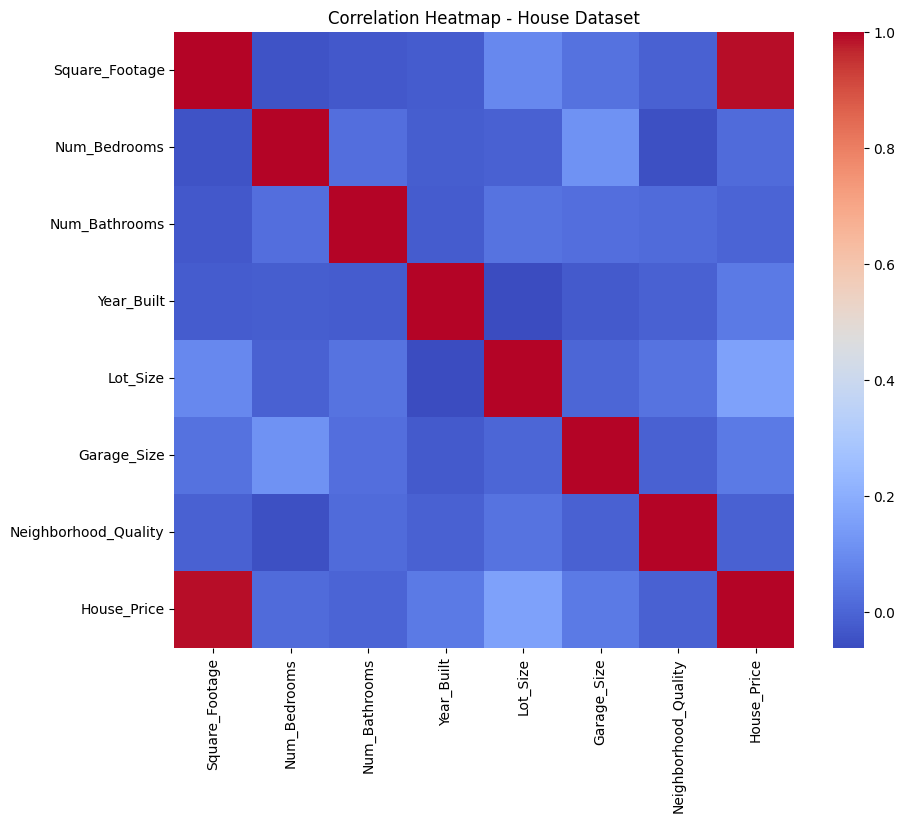


--- House Dataset Metrics ---
Linear R2: 0.9984263636823413
Linear MSE: 101434798.50563568
RF Best Params: {'max_depth': 10, 'n_estimators': 100}
RF R2: 0.99379388783849
RF MSE: 400038896.87978363
Ridge Best Params: {'alpha': 0.1}
Ridge R2: 0.998424876749612
Ridge MSE: 101530644.48993225


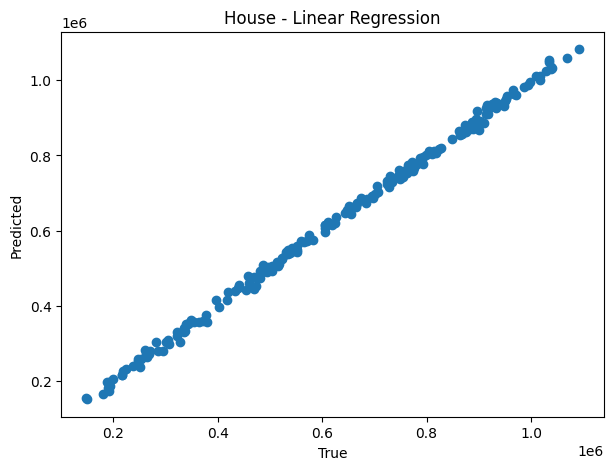

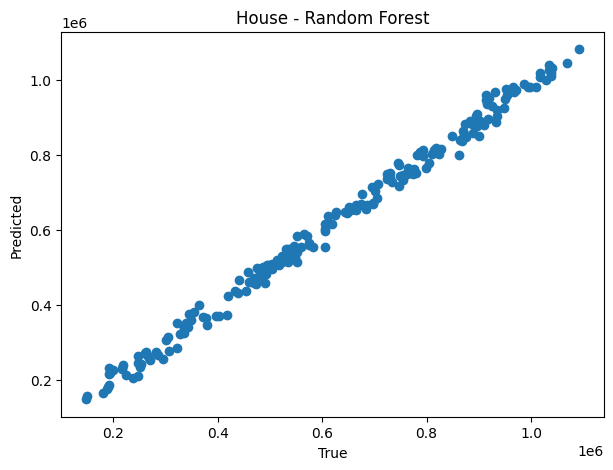

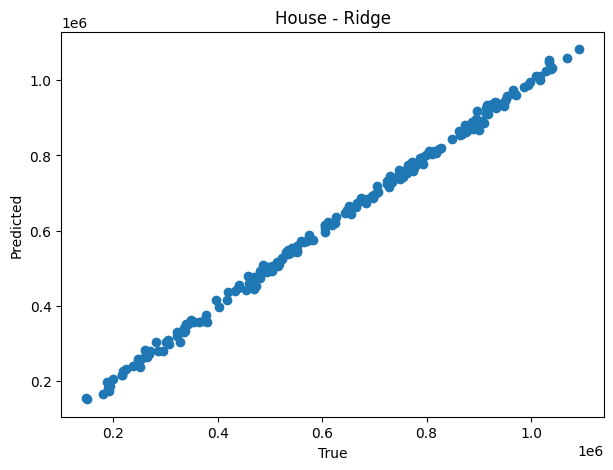

             True       Pred_LR       Pred_RF    Pred_Ridge
521  9.010005e+05  8.686871e+05  8.513676e+05  8.686537e+05
737  4.945375e+05  4.903379e+05  5.084668e+05  4.903516e+05
740  9.494042e+05  9.456671e+05  9.485858e+05  9.456229e+05
660  1.040389e+06  1.033403e+06  1.033478e+06  1.033358e+06
411  7.940100e+05  7.766988e+05  7.973899e+05  7.766822e+05
678  7.240336e+05  7.324441e+05  7.371400e+05  7.324275e+05
626  9.984392e+05  9.950520e+05  9.824097e+05  9.949977e+05
513  9.097134e+05  8.851748e+05  8.792441e+05  8.851366e+05
859  7.926815e+05  7.967305e+05  8.145631e+05  7.967084e+05
136  9.474908e+05  9.317411e+05  9.267389e+05  9.317101e+05
811  7.741500e+05  7.594867e+05  7.498388e+05  7.594724e+05
76   6.544669e+05  6.454094e+05  6.549472e+05  6.454027e+05
636  2.174624e+05  2.177062e+05  2.321790e+05  2.177612e+05
973  1.034380e+06  1.047437e+06  1.040861e+06  1.047390e+06
938  5.304761e+05  5.369853e+05  5.512319e+05  5.369953e+05
899  1.943537e+05  1.878686e+05  2.18053

In [5]:
df_h = pd.read_csv("/content/house_price_regression_dataset (1).csv")
print(df_h.head())

df_h.fillna(df_h.mean(), inplace=True)

df_h.drop_duplicates(inplace=True)


print(df_h.dtypes)


corr_h = df_h.corr()['House_Price'].sort_values(ascending=False)
print(corr_h)

plt.figure(figsize=(10,8))
sns.heatmap(df_h.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - House Dataset")
plt.show()


X_h = df_h.drop('House_Price', axis=1)
y_h = df_h['House_Price']
scaler_h = StandardScaler()
X_h_scaled = scaler_h.fit_transform(X_h)


X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_h_scaled, y_h, test_size=0.2, random_state=42
)


lr_h = LinearRegression().fit(X_train_h, y_train_h)
pred_lr_h = lr_h.predict(X_test_h)


rf = RandomForestRegressor(random_state=42)
params_rf = {"n_estimators": [100, 200], "max_depth": [None, 10]}
grid_rf = GridSearchCV(rf, params_rf, cv=3)
grid_rf.fit(X_train_h, y_train_h)
best_rf = grid_rf.best_estimator_
pred_rf = best_rf.predict(X_test_h)


ridge = Ridge()
params_ridge = {"alpha": [0.1, 1, 10, 50]}
grid_ridge = GridSearchCV(ridge, params_ridge, cv=3)
grid_ridge.fit(X_train_h, y_train_h)
best_ridge = grid_ridge.best_estimator_
pred_ridge = best_ridge.predict(X_test_h)


print("\n--- House Dataset Metrics ---")
print("Linear R2:", r2_score(y_test_h, pred_lr_h))
print("Linear MSE:", mean_squared_error(y_test_h, pred_lr_h))

print("RF Best Params:", grid_rf.best_params_)
print("RF R2:", r2_score(y_test_h, pred_rf))
print("RF MSE:", mean_squared_error(y_test_h, pred_rf))

print("Ridge Best Params:", grid_ridge.best_params_)
print("Ridge R2:", r2_score(y_test_h, pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test_h, pred_ridge))



plt.scatter(y_test_h, pred_lr_h)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("House - Linear Regression")
plt.show()

plt.scatter(y_test_h, pred_rf)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("House - Random Forest")
plt.show()

plt.scatter(y_test_h, pred_ridge)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("House - Ridge")
plt.show()



df_pred_h = pd.DataFrame({
    "True": y_test_h,
    "Pred_LR": pred_lr_h,
    "Pred_RF": pred_rf,
    "Pred_Ridge": pred_ridge
})
print(df_pred_h.head(20))


feat_importances = pd.Series(best_rf.feature_importances_, index=X_h.columns)
print("\nFeature importances:")
print(feat_importances.sort_values(ascending=False))